In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [128]:
df = pd.read_parquet("Data/Steam_Games.parquet")

## Análisis de variables numéricas


In [129]:
df.head()

,Publisher,Genres,App Name,URL,Tags,Reviews URL,Specs,Price,Early Access,ID,Developer,Release Date,Is Free To Play
0,Kotoshiro,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,"[Strategy, Action, Indie, Casual, Simulation]",http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,False,761140,Kotoshiro,2018,False
1,"Making Fun, Inc.","['Free to Play', 'Indie', 'RPG', 'Strategy']",Ironbound,http://store.steampowered.com/app/643980/Ironb...,"[Free to Play, Strategy, Indie, RPG, Card Game...",http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",0.00,False,643980,Secret Level SRL,2018,True
2,Poolians.com,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,"[Free to Play, Simulation, Sports, Casual, Ind...",http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",0.00,False,670290,Poolians.com,2017,True
3,彼岸领域,"['Action', 'Adventure', 'Casual']",弹炸人2222,http://store.steampowered.com/app/767400/2222/,"[Action, Adventure, Casual]",http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,False,767400,彼岸领域,2017,False
4,Trickjump Games Ltd,"['Action', 'Adventure', 'Simulation']",Battle Royale Trainer,http://store.steampowered.com/app/772540/Battl...,"[Action, Adventure, Simulation, FPS, Shooter, ...",http://steamcommunity.com/app/772540/reviews/?...,"[Single-player, Steam Achievements]",3.99,False,772540,Trickjump Games Ltd,2018,False


In [130]:
df["Price"].describe()

count    23939.000000
mean         8.385384
std         15.738258
min          0.000000
25%          1.990000
50%          4.990000
75%          9.990000
max        995.000000
Name: Price, dtype: float64

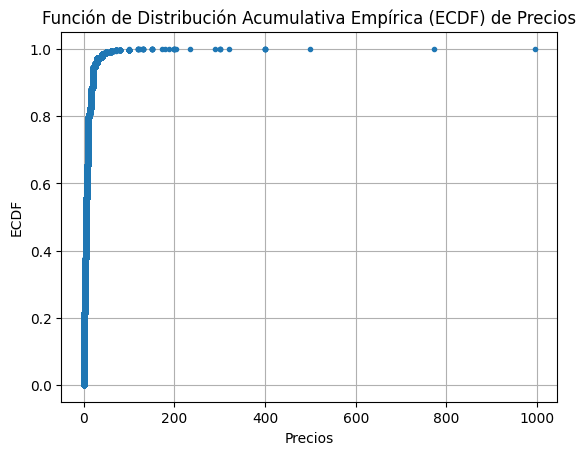

In [131]:
#Probé con varios plots pero al estar la mayoría de valores en un rango pequeño no me revelaban mucho pero encontré este gráfico que sirve bastante.

precios = df['Price']
precios_ordenados = np.sort(precios)

plt.plot(precios_ordenados, np.arange(1, len(precios_ordenados) + 1) / len(precios_ordenados), marker='.', linestyle='none')
plt.xlabel('Precios')
plt.ylabel('ECDF')
plt.title('Función de Distribución Acumulativa Empírica (ECDF) de Precios')
plt.grid(True)
plt.show()

In [132]:
df["Price"].value_counts()

Price
4.99      3142
9.99      3139
0.00      2954
0.99      2163
2.99      1921
          ... 
1.29         1
499.99       1
27.99        1
13.98        1
59.95        1
Name: count, Length: 117, dtype: int64

In [133]:
#Parecen haber valores demasiado elevados por lo que chequié en la database de steam y hay algunos juegos que pude encontrar un 
#un precio real mas bajo por lo que los cambié manualmente.
df[df["Price"]>250]

,Publisher,Genres,App Name,URL,Tags,Reviews URL,Specs,Price,Early Access,ID,Developer,Release Date,Is Free To Play
2178,Aerosoft GmbH,['Simulation'],X-Plane 10 Global - 64 Bit,http://store.steampowered.com/app/292180/XPlan...,"[Simulation, Flight, Realistic, Open World, Mu...",http://steamcommunity.com/app/292180/reviews/?...,"[Single-player, Multi-player, Cross-Platform M...",771.71,False,292180,Laminar Research,2014,False
3824,The Foundry,"['Animation &amp; Modeling', 'Design &amp; Ill...",MODO indie 10,http://store.steampowered.com/app/401090/MODO_...,"[Animation & Modeling, Design & Illustration]",http://steamcommunity.com/app/401090/reviews/?...,[Steam Cloud],299.99,False,401090,The Foundry,2015,False
6889,YoYo Games Ltd.,"['Animation &amp; Modeling', 'Design &amp; Ill...",GameMaker Studio 2 Mobile,http://store.steampowered.com/app/585620/GameM...,"[Game Development, Design & Illustration, Anim...",http://steamcommunity.com/app/585620/reviews/?...,[In-App Purchases],399.99,False,585620,YoYo Games Ltd.,2017,False
6890,YoYo Games Ltd.,"['Animation &amp; Modeling', 'Design &amp; Ill...",GameMaker Studio 2 UWP,http://store.steampowered.com/app/585610/GameM...,"[Game Development, Design & Illustration, Util...",http://steamcommunity.com/app/585610/reviews/?...,[In-App Purchases],399.99,False,585610,YoYo Games Ltd.,2017,False
7117,MAGIX Software GmbH,['Video Production'],MAGIX Video Pro X8 Steam Edition,http://store.steampowered.com/app/598860/MAGIX...,[Video Production],http://steamcommunity.com/app/598860/reviews/?...,[],399.00,False,598860,MAGIX Software GmbH,2017,False
8718,CLO Virtual Fashion,"['Animation &amp; Modeling', 'Design &amp; Ill...",Marvelous Designer 7 For Steam,http://store.steampowered.com/app/707410/Marve...,"[Design & Illustration, Animation & Modeling]",http://steamcommunity.com/app/707410/reviews/?...,[],320.00,False,707410,CLO Virtual Fashion,2017,False
8972,"Strata Mixed Reality, Inc.","['Animation &amp; Modeling', 'Design &amp; Ill...",Strata Spaces VR – Professional Edition Upgrade,http://store.steampowered.com/app/719000/Strat...,"[Design & Illustration, Animation & Modeling]",http://steamcommunity.com/app/719000/reviews/?...,"[Downloadable Content, Steam Achievements, Ste...",995.00,False,719000,"Strata Mixed Reality, Inc.",2017,False
10153,MAGIX Software GmbH,['Video Production'],MAGIX Video Pro X9 Steam Edition,http://store.steampowered.com/app/750840/MAGIX...,[Video Production],http://steamcommunity.com/app/750840/reviews/?...,[],399.00,False,750840,MAGIX Software GmbH,2017,False
10544,RUHRSOURCE GmbH,"['Animation &amp; Modeling', 'Design &amp; Ill...",CUR3D Maker Edition - Permission for commercia...,http://store.steampowered.com/app/691560/CUR3D...,"[Utilities, Design & Illustration, Animation &...",http://steamcommunity.com/app/691560/reviews/?...,[Downloadable Content],499.99,False,691560,RUHRSOURCE GmbH,2017,False
11671,MAGIX Software GmbH,"['Audio Production', 'Video Production']",VEGAS Pro 15 Edit Steam Edition,http://store.steampowered.com/app/689790/VEGAS...,"[Video Production, Audio Production]",http://steamcommunity.com/app/689790/reviews/?...,[],399.00,False,689790,MAGIX Software GmbH,2017,False


In [134]:
df.loc[90702, 'Price'] = 19.99
df.loc[92755, 'Price'] = 14.99
df.loc[97384, 'Price'] = 74.99
df.loc[97385, 'Price'] = 74.99
df.loc[97727, 'Price'] = 79.80
df.loc[100045, 'Price'] = 199.99
df.loc[102614, 'Price'] = 199.99
df.loc[104156, 'Price'] = 78.98
df.loc[105948, 'Price'] = 149.99
df.loc[115162, 'Price'] = 19.99
df.loc[97384, 'Price'] = 74.99
df.loc[97384, 'Price'] = 74.99

In [135]:
#Me quedo con los valores de precio menores a 200 para hacer mas análisis.
df = df[df['Price'] <= 200]

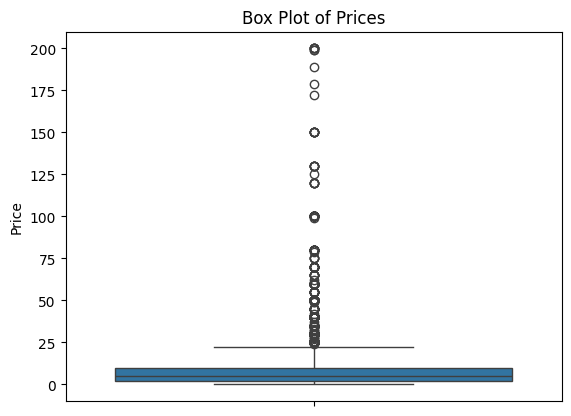

In [136]:
sns.boxplot(y=df.Price)
plt.ylabel('Price')
plt.title('Box Plot of Prices')
plt.show()

## Análisis de variables categóricas

In [137]:
#Desgloso los valores de la columna genres
genres = df['Genres'].str.split(',').explode().str.strip()
genres = genres.str.replace(r"[\[\]']", '', regex=True)

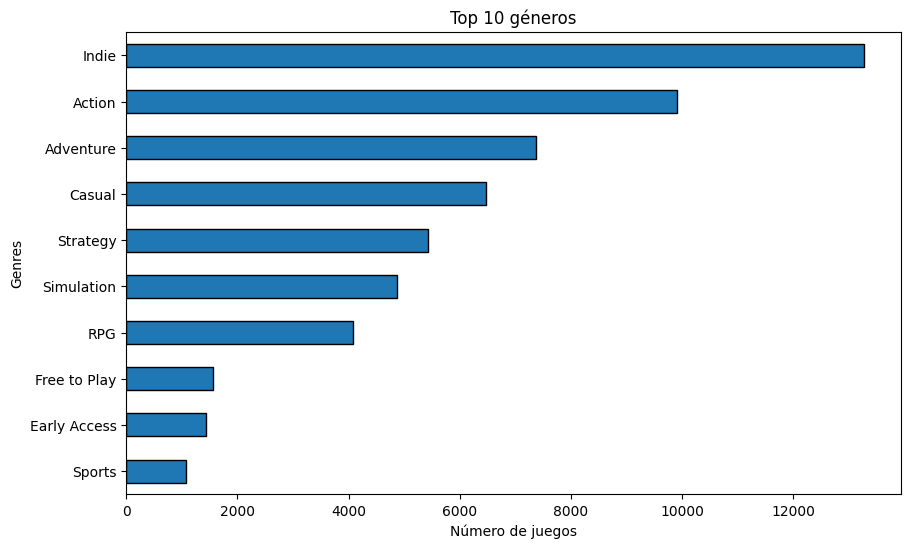

In [138]:
#Cuento cuantos juegos hay para cada género y hago un ranking.
genres_count = genres.value_counts()
plt.figure(figsize=(10, 6))
genres_count.head(10).sort_values().plot(kind='barh',edgecolor='black')
plt.xlabel('Número de juegos')
plt.title('Top 10 géneros')
plt.show()

In [139]:
df.dropna(subset="Release Date", inplace=True)

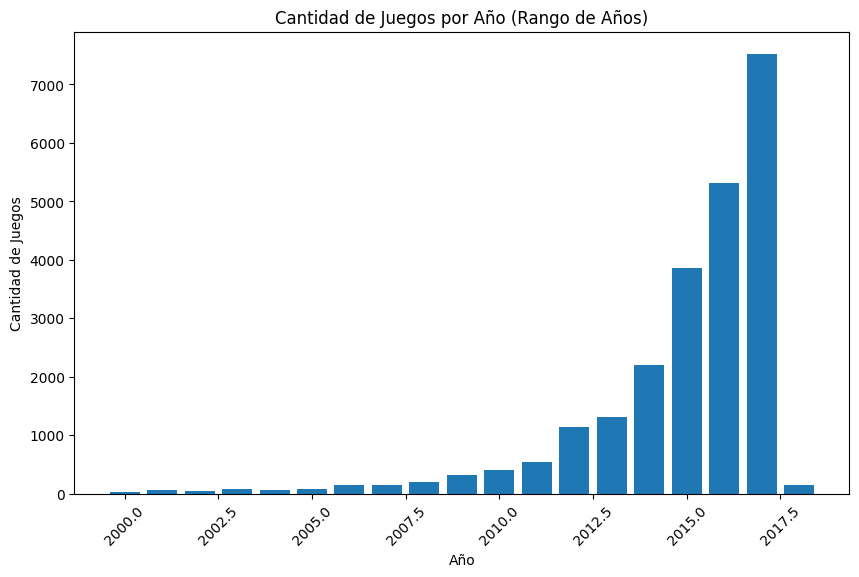

In [140]:
df['Release Date'] = df['Release Date'].astype(int)

# Definir el rango de años
inicio_rango =   2000  # Año de inicio del rango
final_rango =   2018  # Año final del rango

# Filtrar el DataFrame para incluir solo los años dentro del rango especificado
df_filtrado = df[(df['Release Date'] >= inicio_rango) & (df['Release Date'] <= final_rango)]

# Contar la cantidad de juegos por año dentro del rango y ordenar por año
juegos_por_año = df_filtrado['Release Date'].value_counts().sort_index()

# Crea el gráfico
plt.figure(figsize=(10,   6))
plt.bar(juegos_por_año.index, juegos_por_año.values)
plt.xlabel('Año')
plt.ylabel('Cantidad de Juegos')
plt.title('Cantidad de Juegos por Año (Rango de Años)')
plt.xticks(rotation=45) 
plt.show()